**MAIOT**

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
import pandas as pd

df = pd.read_csv('UserData-sensordata-x.csv', sep=";")

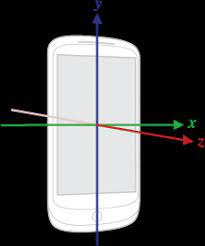

In [ ]:
df.head()

,id,time,x,y,z
0,1,1708625480656,-0.061316,0.333799,9.914660
1,2,1708625480848,-0.059222,0.337388,9.917353
2,3,1708625481047,-0.063410,0.335294,9.918549
3,4,1708625481249,-0.062512,0.335892,9.913465
4,5,1708625481449,-0.063111,0.336192,9.918250


In [ ]:
df_cols= list(zip(list(df.columns), [str(d) for d in df.dtypes]))
print(df_cols)

[('id', 'int64'), ('time', 'int64'), ('x', 'float64'), ('y', 'float64'), ('z', 'float64')]


<Axes: >

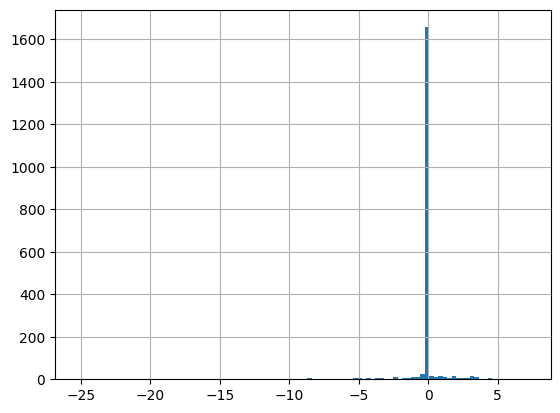

In [ ]:
df["x"].hist(bins=100)

<Axes: >

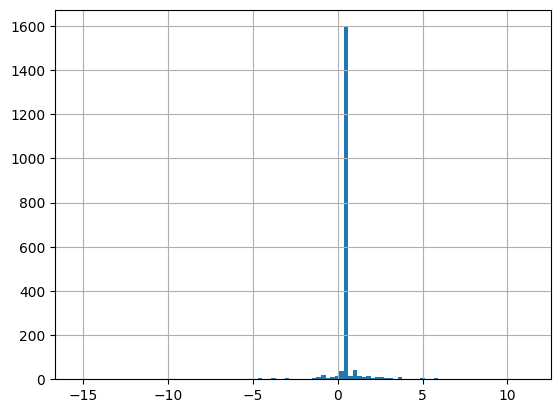

In [ ]:
df["y"].hist(bins=100)

<Axes: >

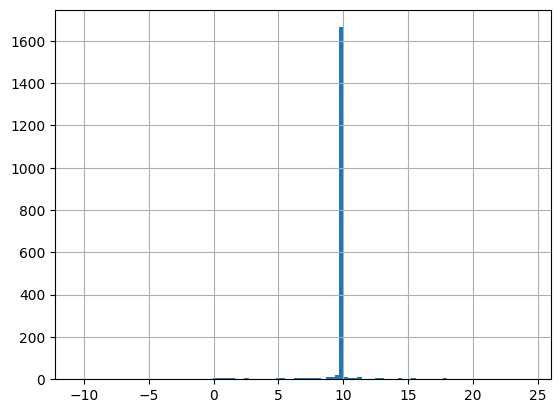

In [ ]:
df["z"].hist(bins=100)

In [ ]:
import datetime
# funzioni per conversione timestamp

#converte stringa in oggetto datetime
def convert_to_timestamp(ts):
    dt_object = datetime.datetime.strptime(ts, "%Y/%m/%d %H:%M:%S:%f")
    return dt_object

#converte oggetto timestamp in millisecondi in oggetto datetime
def convert_timestamp(ts):
    ts = ts / 1000.0
    dt_object = datetime.datetime.fromtimestamp(ts)
    return dt_object

# conversione della feature time
df["time"] = df["time"].apply(convert_timestamp)
# eliminazione di eventuali valori temporali anomali
df = df.loc[df["time"].astype(int) > 10e12, :]

(1932, 4)


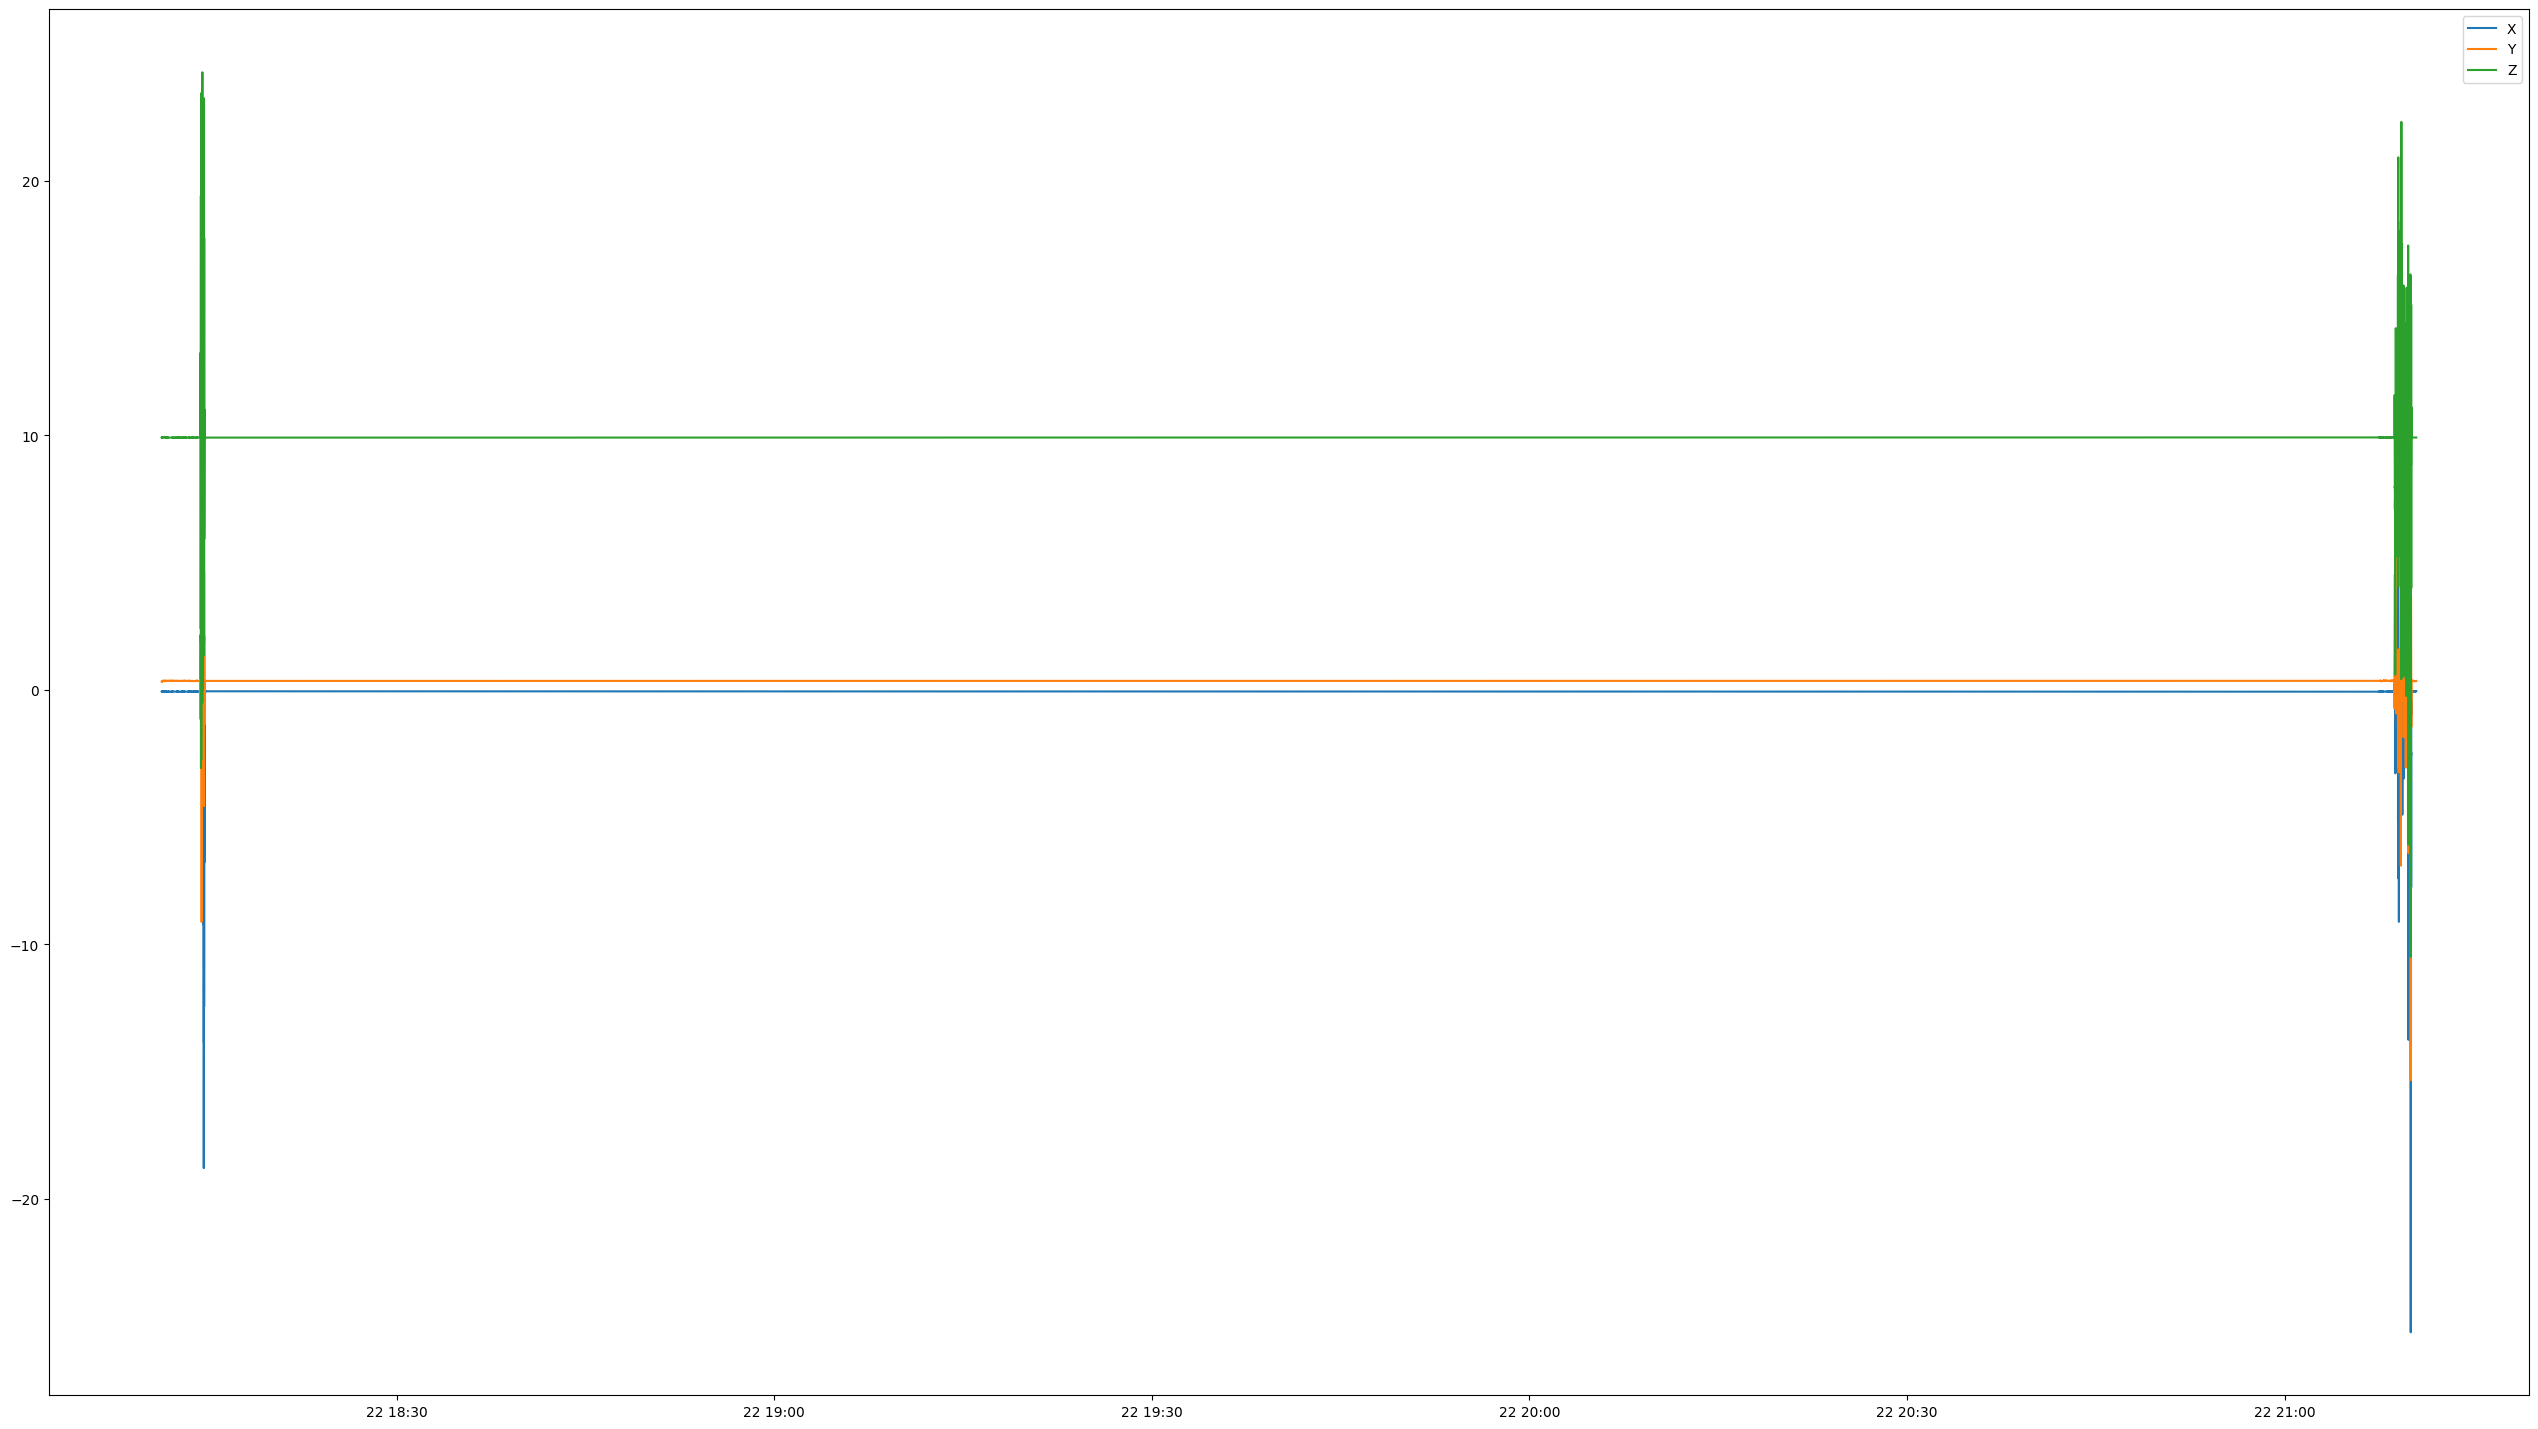

In [ ]:
#eliminazione duplicati e ordinamento per tempo
aux = df.loc[:, ["time", "x", "y", "z"]].drop_duplicates(keep="first").sort_values("time")
print(aux.shape)
plt.figure(figsize=(32, 18))
plt.plot(aux["time"], aux["x"], label='X')
plt.plot(aux["time"], aux["y"], label='Y')
plt.plot(aux["time"], aux["z"], label='Z')
plt.legend()
plt.show()

In [ ]:
# Definizione delle funzioni di aggregazione
agg_functions = {
    'x': ['mean', 'var', 'max', 'min', 'skew', lambda x: np.nan if len(x) == 1 else scipy.stats.kurtosis(x)],
    'y': ['mean', 'var', 'max', 'min', 'skew', lambda x: np.nan if len(x) == 1 else scipy.stats.kurtosis(x)],
    'z': ['mean', 'var', 'max', 'min', 'skew', lambda x: np.nan if len(x) == 1 else scipy.stats.kurtosis(x)]
}

# skewness = asimmetria della distribuzione dei dati rispetto alla media: un valore positivo indica una coda più lunga verso destra,
# mentre un valore negativo indica una coda più lunga verso sinistra

# kurtosis = fornisce informazioni sulla forma delle code della distribuzione dei dati rispetto alla distribuzione normale.
# Una distribuzione normale ha una kurtosis di 3. Valori di kurtosis superiori a 3 indicano che le code della distribuzione sono più "pesanti"
# e più pronunciate rispetto alla distribuzione normale, mentre valori inferiori a 3 indicano code meno estreme.

# valore assoluto
df["x"] = np.abs(df["x"])
df["y"] = np.abs(df["y"])
df["z"] = np.abs(df["z"])

# distanza tra le finestre
step = 1

#dimensione della finestra
window_size = 20

# Calcolo delle statistiche raggruppate per 'window'
result_df = df.rolling(window=window_size, step=step, min_periods=3).agg(agg_functions)
# Rinomina le colonne del DataFrame risultante
result_df.columns = ['_'.join(col).replace("<lambda>", "kurt") for col in result_df.columns.values]

result_df = result_df.loc[~result_df["x_mean"].isnull()]
result_df = result_df.reset_index()
result_df.head(20)

,index,x_mean,x_var,x_max,x_min,x_skew,x_kurt,y_mean,y_var,y_max,y_min,y_skew,y_kurt,z_mean,z_var,z_max,z_min,z_skew,z_kurt
0,2,0.061316,0.000004,0.063410,0.059222,1.931123e-11,-1.500000,0.335494,0.000003,0.337388,0.333799,4.916038e-01,-1.500000,9.916854,0.000004,9.918549,9.914660,-1.056549,-1.500000
1,3,0.061615,0.000003,0.063410,0.059222,-8.107109e-01,-1.190414,0.335593,0.000002,0.337388,0.333799,-4.178369e-08,-1.105182,9.916007,0.000006,9.918549,9.913465,0.000359,-1.684394
2,4,0.061914,0.000003,0.063410,0.059222,-1.214390e+00,-0.788757,0.335713,0.000002,0.337388,0.333799,-4.175232e-01,-0.758589,9.916455,0.000005,9.918549,9.913465,-0.601791,-1.575726
3,5,0.061466,0.000004,0.063410,0.059222,-4.350398e-01,-1.588169,0.336441,0.000005,0.340080,0.333799,8.908282e-01,-0.382614,9.916555,0.000004,9.918549,9.913465,-0.804702,-1.229095
4,6,0.061145,0.000004,0.063410,0.059222,1.471726e-02,-1.758082,0.336491,0.000004,0.340080,0.333799,7.987096e-01,-0.046450,9.916840,0.000004,9.918549,9.913465,-1.027880,-0.941255
5,7,0.060942,0.000003,0.063410,0.059222,3.246877e-01,-1.703510,0.336379,0.000003,0.340080,0.333799,1.007557e+00,0.371715,9.916979,0.000004,9.918549,9.913465,-1.245113,-0.549411
6,8,0.060917,0.000003,0.063410,0.059222,3.885737e-01,-1.528710,0.336358,0.000003,0.340080,0.333799,1.083009e+00,0.828052,9.917220,0.000004,9.919147,9.913465,-1.276458,-0.286287
7,9,0.060867,0.000003,0.063410,0.059222,5.046249e-01,-1.345776,0.336221,0.000003,0.340080,0.333799,1.238982e+00,1.077985,9.917293,0.000003,9.919147,9.913465,-1.426074,0.114834
8,10,0.060745,0.000003,0.063410,0.059222,6.793278e-01,-1.202210,0.336382,0.000003,0.340080,0.333799,8.796540e-01,0.399983,9.917325,0.000003,9.919147,9.913465,-1.528989,0.500965
9,11,0.060444,0.000003,0.063410,0.057129,1.878151e-01,-0.731229,0.335220,0.000019,0.340080,0.322433,-2.603549e+00,4.705661,9.916580,0.000009,9.919147,9.908380,-2.059683,2.287040


Modello: OneClassSVM

Algoritmo di outlier detection (rilevamento di valori anomali) non supervisionato. Cerca di costruire un iperpiano che separi la maggior parte delle osservazioni, identificando quelle che si discostano come anomalie, senza richiedere etichette di classe.

In [ ]:
from sklearn import svm

data = result_df.loc[result_df["index"] > 10, :]
model = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
model.fit(data.drop("index", axis=1))

# Effettuiamo la predizione
predictions = model.predict(data.drop("index", axis=1))

data["predictions"] = predictions
data.head()

<ipython-input-13-c6c22980e4d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["predictions"] = predictions


,index,x_mean,x_var,x_max,x_min,x_skew,x_kurt,y_mean,y_var,y_max,y_min,y_skew,y_kurt,z_mean,z_var,z_max,z_min,z_skew,z_kurt,predictions
9,11,0.060444,0.000003,0.063410,0.057129,0.187815,-0.731229,0.335220,0.000019,0.340080,0.322433,-2.603549,4.705661,9.916580,0.000009,9.919147,9.90838,-2.059683,2.287040,1
10,12,0.060971,0.000007,0.067298,0.057129,1.124148,0.751219,0.336675,0.000045,0.354138,0.322433,0.804902,3.059947,9.917905,0.000031,9.933804,9.90838,1.695061,3.631459,1
11,13,0.061337,0.000008,0.067298,0.057129,0.848243,-0.253847,0.337110,0.000044,0.354138,0.322433,0.592761,2.648975,9.918229,0.000030,9.933804,9.90838,1.461599,3.169563,1
12,14,0.061196,0.000008,0.067298,0.057129,0.960398,-0.088689,0.337268,0.000041,0.354138,0.322433,0.518958,2.892832,9.918609,0.000030,9.933804,9.90838,1.194935,2.453934,1
13,15,0.061316,0.000008,0.067298,0.057129,0.816813,-0.207572,0.337463,0.000039,0.354138,0.322433,0.422433,3.041592,9.918680,0.000029,9.933804,9.90838,1.175061,2.725389,1


Modello: IsolationForest

Algoritmo di outlier detection non supervisionato che rileva i valori anomali utilizzando alberi binari. Suddivide ricorsivamente i dati utilizzando alberi decisionali casuali, identificando le anomalie come punti isolati che richiedono meno divisioni per essere separate dal resto del dataset.

In [ ]:
from sklearn.ensemble import IsolationForest

data = result_df
model = IsolationForest(contamination=0.1)
model.fit(data.drop("index", axis=1))

# Effettuiamo la predizione
predictions = model.predict(data.drop("index", axis=1))

data["predictions"] = predictions
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,index,x_mean,x_var,x_max,x_min,x_skew,x_kurt,y_mean,y_var,y_max,y_min,y_skew,y_kurt,z_mean,z_var,z_max,z_min,z_skew,z_kurt,predictions
0,2,0.061316,0.000004,0.06341,0.059222,1.931123e-11,-1.500000,0.335494,0.000003,0.337388,0.333799,4.916038e-01,-1.500000,9.916854,0.000004,9.918549,9.914660,-1.056549,-1.500000,1
1,3,0.061615,0.000003,0.06341,0.059222,-8.107109e-01,-1.190414,0.335593,0.000002,0.337388,0.333799,-4.178369e-08,-1.105182,9.916007,0.000006,9.918549,9.913465,0.000359,-1.684394,1
2,4,0.061914,0.000003,0.06341,0.059222,-1.214390e+00,-0.788757,0.335713,0.000002,0.337388,0.333799,-4.175232e-01,-0.758589,9.916455,0.000005,9.918549,9.913465,-0.601791,-1.575726,1
3,5,0.061466,0.000004,0.06341,0.059222,-4.350398e-01,-1.588169,0.336441,0.000005,0.340080,0.333799,8.908282e-01,-0.382614,9.916555,0.000004,9.918549,9.913465,-0.804702,-1.229095,1
4,6,0.061145,0.000004,0.06341,0.059222,1.471726e-02,-1.758082,0.336491,0.000004,0.340080,0.333799,7.987096e-01,-0.046450,9.916840,0.000004,9.918549,9.913465,-1.027880,-0.941255,1


In [ ]:
data.head(30)

,index,x_mean,x_var,x_max,x_min,x_skew,x_kurt,y_mean,y_var,y_max,y_min,y_skew,y_kurt,z_mean,z_var,z_max,z_min,z_skew,z_kurt,predictions
0,2,0.061316,0.000004,0.063410,0.059222,1.931123e-11,-1.500000,0.335494,0.000003,0.337388,0.333799,4.916038e-01,-1.500000,9.916854,0.000004,9.918549,9.914660,-1.056549,-1.500000,1
1,3,0.061615,0.000003,0.063410,0.059222,-8.107109e-01,-1.190414,0.335593,0.000002,0.337388,0.333799,-4.178369e-08,-1.105182,9.916007,0.000006,9.918549,9.913465,0.000359,-1.684394,1
2,4,0.061914,0.000003,0.063410,0.059222,-1.214390e+00,-0.788757,0.335713,0.000002,0.337388,0.333799,-4.175232e-01,-0.758589,9.916455,0.000005,9.918549,9.913465,-0.601791,-1.575726,1
3,5,0.061466,0.000004,0.063410,0.059222,-4.350398e-01,-1.588169,0.336441,0.000005,0.340080,0.333799,8.908282e-01,-0.382614,9.916555,0.000004,9.918549,9.913465,-0.804702,-1.229095,1
4,6,0.061145,0.000004,0.063410,0.059222,1.471726e-02,-1.758082,0.336491,0.000004,0.340080,0.333799,7.987096e-01,-0.046450,9.916840,0.000004,9.918549,9.913465,-1.027880,-0.941255,1
5,7,0.060942,0.000003,0.063410,0.059222,3.246877e-01,-1.703510,0.336379,0.000003,0.340080,0.333799,1.007557e+00,0.371715,9.916979,0.000004,9.918549,9.913465,-1.245113,-0.549411,1
6,8,0.060917,0.000003,0.063410,0.059222,3.885737e-01,-1.528710,0.336358,0.000003,0.340080,0.333799,1.083009e+00,0.828052,9.917220,0.000004,9.919147,9.913465,-1.276458,-0.286287,1
7,9,0.060867,0.000003,0.063410,0.059222,5.046249e-01,-1.345776,0.336221,0.000003,0.340080,0.333799,1.238982e+00,1.077985,9.917293,0.000003,9.919147,9.913465,-1.426074,0.114834,1
8,10,0.060745,0.000003,0.063410,0.059222,6.793278e-01,-1.202210,0.336382,0.000003,0.340080,0.333799,8.796540e-01,0.399983,9.917325,0.000003,9.919147,9.913465,-1.528989,0.500965,1
9,11,0.060444,0.000003,0.063410,0.057129,1.878151e-01,-0.731229,0.335220,0.000019,0.340080,0.322433,-2.603549e+00,4.705661,9.916580,0.000009,9.919147,9.908380,-2.059683,2.287040,1


In [ ]:
import pickle

# Export IsolationForest object as pickle file (bytes)
with open("isolation_forest.pkl", "wb") as f:
  pickle.dump(obj=model, file=f)

In [ ]:
data.loc[data["predictions"] == -1, "index"]

906      908
907      909
909      911
925      927
926      928
        ... 
1814    1816
1815    1817
1816    1818
1817    1819
1828    1830
Name: index, Length: 193, dtype: int64

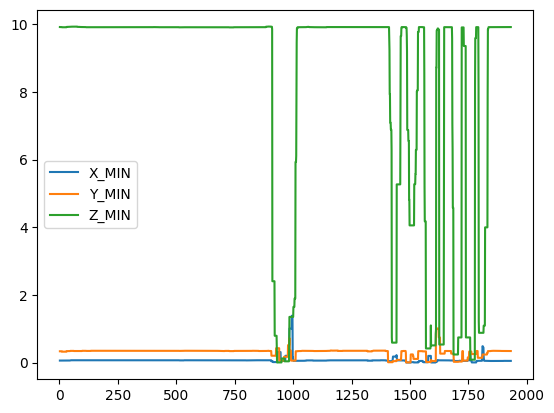

In [ ]:
plt.figure()
# plt.plot(data["index"], data["x_mean"], label="X")
# plt.plot(data["index"], data["y_mean"], label="Y")
# plt.plot(data["index"], data["z_mean"], label="Z")
plt.plot(data["index"], data["x_min"], label="X_MIN")
plt.plot(data["index"], data["y_min"], label="Y_MIN")
plt.plot(data["index"], data["z_min"], label="Z_MIN")
# plt.plot(data["index"], data["x_max"], label="X_MAX")
# plt.plot(data["index"], data["y_max"], label="Y_MAX")
# plt.plot(data["index"], data["z_max"], label="Z_MAX")

plt.legend()
plt.show()

<Axes: >

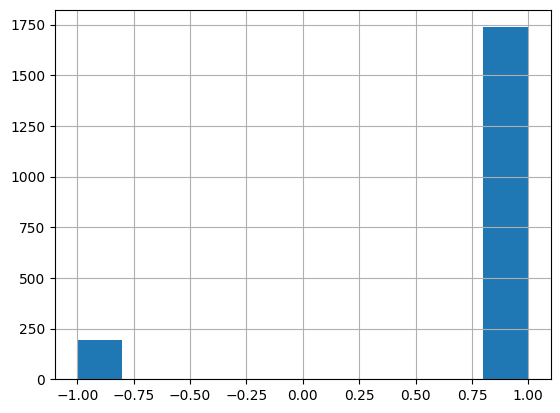

In [ ]:
data["predictions"].hist()